/home/benjamin/git/swiss-river-network


/tmp/ipykernel_32471/2994925684.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(methods_labels)


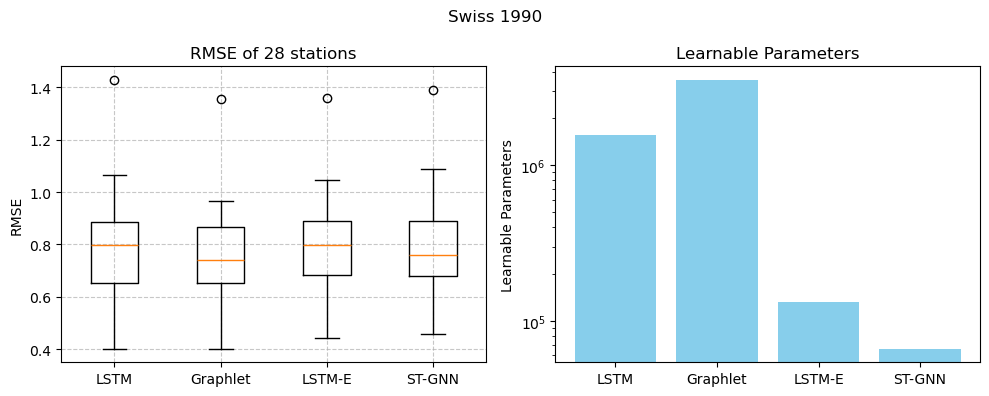

~ Statistics of RMSE
~~~ Mean ~~~
lstm:	0.793
graphlet:	0.761
lstm_embedding:	0.801
stgnn:	0.787
~~~ Std ~~~
lstm:	0.198
graphlet:	0.189
lstm_embedding:	0.191
stgnn:	0.195
~~~ Median ~~~
lstm:	0.799
graphlet:	0.74
lstm_embedding:	0.799
stgnn:	0.758
~~~ Min ~~~
lstm:	0.402
graphlet:	0.401
lstm_embedding:	0.441
stgnn:	0.457
~~~ Max ~~~
lstm:	1.428
graphlet:	1.357
lstm_embedding:	1.359
stgnn:	1.391


In [1]:
# Magic home
%cd /home/benjamin/git/swiss-river-network/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# nicer labels for plots
label = dict()
label['lstm'] = 'LSTM'
label['graphlet'] = 'Graphlet'
label['lstm_embedding'] = 'LSTM-E'
label['stgnn'] = 'ST-GNN'
label['swiss-1990'] = 'Swiss 1990'
label['swiss-2010'] = 'Swiss 2010'
label['zurich'] = 'Zurich'
    
# Variables
GRAPH_NAME = ['swiss-1990', 'swiss-2010', 'zurich'][0]
METHODS = ['lstm', 'graphlet', 'lstm_embedding', 'stgnn']
METRIC = ['RMSE', 'MAE', 'NSE'][0]
EXPORT_PGF = False

def show(filename):
    if EXPORT_PGF:
        plt.savefig(f"swissrivernetwork/journal/visualize_results/figures/{filename}", dpi=300, bbox_inches='tight')
    else:
        plt.show()


# Setup PGF:
if EXPORT_PGF:
    mpl.use("pgf")

    # Optional: Configure fonts to match LaTeX document
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",  # or xelatex, lualatex
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    })

# Initialize nicer labels:
methods_labels = [label[m] for m in METHODS]

# Read Files
dfs = [pd.read_csv(f'swissrivernetwork/journal/dump/test_results/{GRAPH_NAME}_{m}.csv') for m in METHODS]

# TODO: validate station and order.

# Concat for boxplot:
data = [df[METRIC] for df in dfs]

# Prüfen, ob Stationen übereinstimmen (optional)
#if not df1["Station Nr"].equals(df2["Station Nr"]):
#    print("Warnung: Stationen stimmen nicht überein!")

# Boxplot-Daten vorbereiten
#data = [df1["RMSE"], df2["RMSE"]]

# Plot erstellen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f'{label[GRAPH_NAME]}')

ax1.boxplot(data, labels=methods_labels)
#ax1.set_ylim(0.5, 1.0) # for outliders
ax1.set_title(f'{METRIC} of {len(dfs[0])} stations')
ax1.set_ylabel(METRIC)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot mit Parameter Count:
df_parameter = pd.read_csv('swissrivernetwork/journal/visualize_results/learnable_parameters.csv')
df_parameter.loc[1, ['swiss-1990', 'swiss-2010', 'zurich']] += df_parameter.loc[0, ['swiss-1990', 'swiss-2010', 'zurich']] # real parameter count
ax2.bar(df_parameter["Method"], df_parameter[GRAPH_NAME], color='skyblue')
ax2.set_xticklabels(methods_labels)
ax2.set_title(f"Learnable Parameters")
ax2.set_ylabel("Learnable Parameters")
ax2.set_yscale('log')


plt.tight_layout()


show(f'plot_{GRAPH_NAME}_{METRIC}.pgf')


# Create Table:
print(f'~ Statistics of {METRIC}')
print('~~~ Mean ~~~')
[print(f'{m}:\t{data[i].mean():.3}') for i,m in enumerate(METHODS)]
print('~~~ Std ~~~')
[print(f'{m}:\t{data[i].std():.3}') for i,m in enumerate(METHODS)]
print('~~~ Median ~~~')
[print(f'{m}:\t{data[i].median():.3}') for i,m in enumerate(METHODS)]
print('~~~ Min ~~~')
[print(f'{m}:\t{data[i].min():.3}') for i,m in enumerate(METHODS)]
print('~~~ Max ~~~')
[print(f'{m}:\t{data[i].max():.4}') for i,m in enumerate(METHODS)]


pass


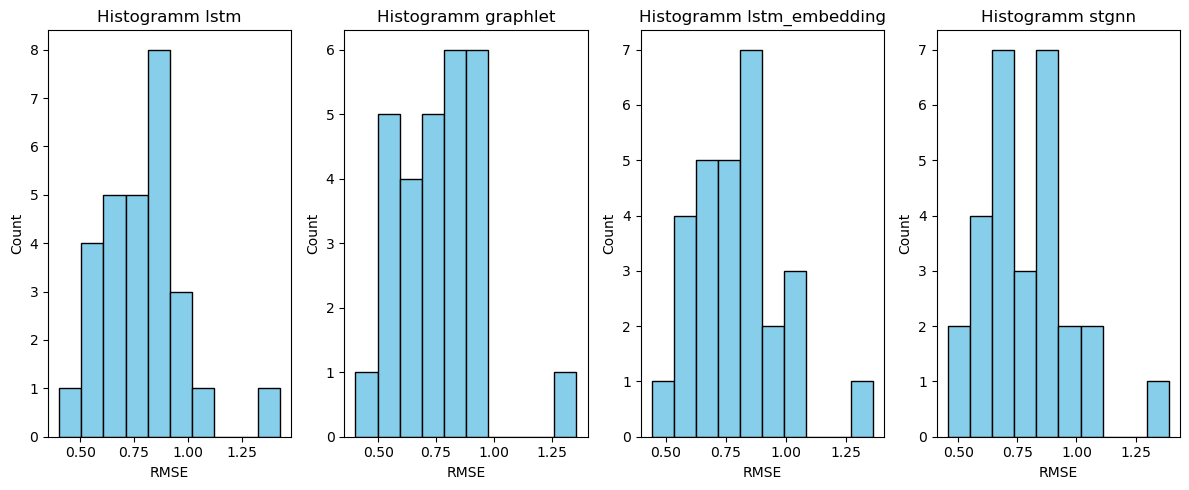

In [2]:

# Histogramme plotten
plt.figure(figsize=(12,5))

def plot_hist(index):
    plt.subplot(1, 4, index+1)
    plt.hist(dfs[index]["RMSE"], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogramm {METHODS[index]}")
    plt.xlabel("RMSE")
    plt.ylabel("Count")


for i,_ in enumerate(METHODS):
    plot_hist(i)


plt.tight_layout()
plt.show()

In [ ]:
# Plot Graph with edges.

from scipy.stats import wilcoxon

from swissrivernetwork.gbr25.graph_exporter import plot_graph

from swissrivernetwork.benchmark.train_isolated_station import read_graph, read_stations

# Create custom information:

# Deprecated: information replaces the station text.
# Updated: information changes the color.

# Create average df:
combined_rmse = pd.concat([dfs[0]['RMSE'], dfs[1]['RMSE'], dfs[2]['RMSE'], dfs[3]['RMSE']], axis=1)
combined_rmse.columns = ['RMSE_1', 'RMSE_2', 'RMSE_3', 'RMSE_4']
mean_rmse = combined_rmse.mean(axis=1)
base_rmse = dfs[0]['RMSE']

# Do Statistical Tests:
for i in range(1, 4):
    other = dfs[i]['RMSE']
    stat, p = wilcoxon(base_rmse, other, alternative='greater')
    print(f'[WILCOXON] (LSTM, {methods_labels[i]}):', p)

    # Visually
    diffs = base_rmse - other # => diffs > 0 RMSE of other is smaller
    print('wins: ', np.sum(diffs > 0), 'losses:', np.sum(diffs <= 0))
    #plt.figure()
    #plt.hist(diffs, bins = 10)
    #plt.xlim(-0.5, 0.5)
    #plt.show()





[WILCOXON] (LSTM, Graphlet): 0.0025882013142108917
wins:  20 losses: 8
[WILCOXON] (LSTM, LSTM-E): 0.5044699460268021
wins:  15 losses: 13
[WILCOXON] (LSTM, ST-GNN): 0.3309022970497608
wins:  14 losses: 14


min_color 0.0 max_color 0.0
min_color -0.11739530000000009 max_color 0.07354749999999999
min_color -0.12579715000000002 max_color 0.22052479999999997
min_color -0.12339705000000001 max_color 0.1245042500000001


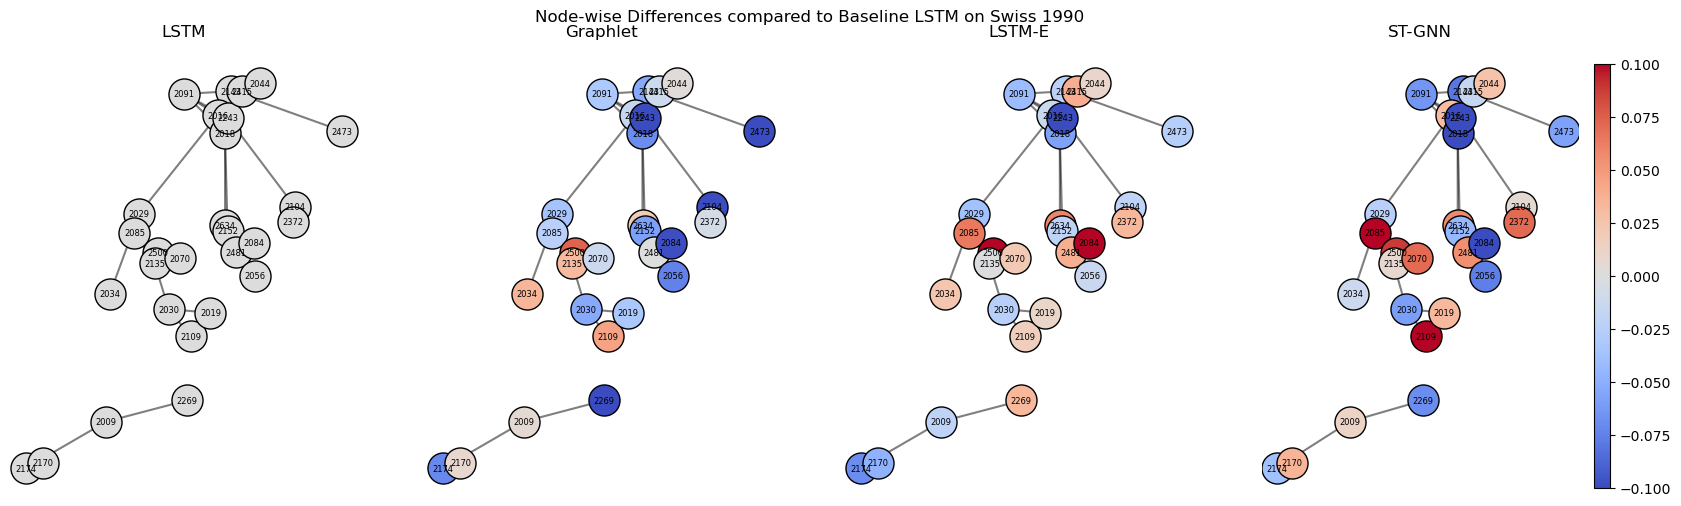

In [4]:


stations = read_stations(GRAPH_NAME)
g,e = read_graph(GRAPH_NAME)

# Create Subpltos:
fig, axes = plt.subplots(1, 4, figsize=(16, 5.5))  # 1 rows, 4 columns
axes = axes.flatten()  # Flatten to 1D array for easy looping

for i in range(4):
    # compute gains
    information = dict()
    color = dict()
    for j,station in enumerate(stations):
        information[station] = f'j:{j}'
        color[station] = dfs[i]['RMSE'].iloc[j] - base_rmse.iloc[j]

    # plot gains:
    ax = axes[i]  
    plt.sca(ax)  
    plot_graph(g, e, information, color, vmin=-0.1, vmax=0.1, cmap='coolwarm', skipcolorbar=(i != 3))

    # fix subplot:
    ax.set_title(label[METHODS[i]], pad=20)
    ax.axis('off')


plt.suptitle(f'Node-wise Differences compared to Baseline LSTM on {label[GRAPH_NAME]}')
#plt.tight_layout(rect=[0, 0, 1, 0.95])  
#fig.subplots_adjust()

#plt.subplots_adjust(top=2.0)
#plt.tight_layout(pad=5.0)

fig.subplots_adjust(left=0.0, right=1.0)

show('plot_differences_{graph_name}.pgf')


# Graphlet vs LSTM:
#stations = read_stations(GRAPH_NAME)
#df_base = dfs[2]
#df_improve = dfs[3]

#information = dict()
#color = dict()
#for i,station in enumerate(stations):
#    information[station] = f'i:{i}'
#    color[station] = df_improve['RMSE'].iloc[i] - df_base['RMSE'].iloc[i]

# print merge:
#df_merge = pd.merge(df_base, df_improve, on='Station')[['Station', 'RMSE_x', 'RMSE_y']]
#df_merge['diff'] = df_merge['RMSE_y'] - df_merge['RMSE_x']
#print(df_merge)



